<h1 style="color:rgb(0,120,170)"> Gradient Boosting</h1>

This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

<h2 style="color:rgb(0,120,170)">Task 1: AdaBoostM1 is an instance of forward stagewise modelling</h2>


In the lecture it was mentioned that the first boosting algorithm, i.e. AdaBoostM1 is equivalent to forward stagewise modeling using the exponential loss $L(y,f(x))=\exp(-yf(x))$. In this task we intend to provide a proof of this fact. We will guide you through the most important steps, though, and you will have to add some details.<br>
For AdaBoostM1 the basis functions are the individual classifiers $G_m(x) \in \left\{ -1,1 \right\}$. Using the exponential loss we have to solve 
$$(\beta_m,G_m)= \arg \min_{\beta,G} \sum_{i=1}^N \exp(-y_i(f_{m-1}(x_i)+\beta G(x_i)),$$ for the classifier $G_m$ and the coefficient $\beta_m$ which are added at each step. This can be rewritten as
$$(\beta_m,G_m)= \arg \min_{\beta,G} \sum_{i=1}^N w_i^m \exp(-y_i \beta G(x_i)), \qquad (1)$$ with $w_i^m=\exp(-y_i f_{m-1}(x_i))$. Since each $w^m_i$ depends neither on $\beta$ nor $G(x)$, it can be regarded as a weight that is applied to each observation. This weight depends on $f_{m−1}(x_i)$, and so the individual weight values change with each iteration $m$. The solution of (1) can be found in two steps:

As first step fix $\beta$ and show that the solution to (1) in this case is $G_m=\arg \min_{G} \sum_{i=1}^N w_i^m I(G(x_i) \ne y_i)$. Hints:
* Try to write the expressions in (1) after $\arg \min$ in the form $\sum_{G(x_i)=y_i}(...)+\sum_{G(x_i)\ne y_i}(...)$. Try to find the right expressions for (...), such that the product $G(x_i)y_i$ doesn't appear there anymore.
* Now show that this can be written as $$(\exp(\beta)-\exp(-\beta))\sum_{G(x_i)\ne y_i}w_i^m+ \exp(-\beta) \sum_{i=1}^N w_i^m.\qquad (2)$$ Try to add and subtract an appropriate term.
* Argue why this already implies the claim.



The classifier implies $ exp(-y_i \beta G(x_i))$ is equal to 

$$ exp(\beta)I(y_i \ne G(x_i)) + exp(-\beta)(1-I(y_i \ne G(x_i))) $$

Hence, the equation $ \sum_{i=1}^N exp(-y_i \beta G(x_i)) $ can be written as

$$ (exp(\beta) - exp(-\beta))\sum_{i=1}^N w_i^m I(y_i \ne G(x_i)) + exp(- \beta) \sum_{i=1}^N w_i^m $$


The optimization problem becomes

$$ argmin_G \sum_{i=1}^N w_i^m exp(-y_i \beta G(x_i)) = argmin_G \Big(exp(\beta) - exp(-\beta))\sum_{i=1}^N w_i^m I(y_i \ne G(x_i)) + exp(- \beta) \sum_{i=1}^N w_i^m \Big) $$

then, 

$$ argmin_G \sum_{i=1}^N w_i^m exp(-y_i \beta G(x_i)) = argmin_G \Big(\sum_{i=1}^N w_i^m I(y_i \ne G(x_i)) \Big) $$

Hence,

$$ G_m = argmin_G \Big(\sum_{i=1}^N w_i^m I(y_i \ne G(x_i)) \Big) $$



The approximation can be updated as

$$ f_m(x) = f_{m-1}(x) + \beta_m G_m(x) $$ 

which leads to update the weights for the next iteration to be 

$$ w_i^{m+1} = w_i^{m+1} = w_i^m exp(-\beta_m y_i G_m(x_i)) $$

using the fact that $-y_i G_m(x_i) = -1 + 2I(y_i \ne G_m(x_i)) $

then, it becomes

$$ w_i^{m+1} = w_i^m exp(2\beta_m I(y_i \ne G_m(x)) exp(-\beta_m) $$

<br/>


For details, please see answer of the third question.


<br/>

In the algorithm of AdaBoost.M1, fitting a classifier $G_m(x)$ to the training data using weights $w_i$ could be same method as for approximately solving the minimization in the equation (2) and hence $G_m=\arg \min_{G} \sum_{i=1}^N w_i^m I(G(x_i) \ne y_i)$

Hence, we could conclude that AdaBoost.M1 is to minimize the exponential loss criterion $L(y,f(x))=\exp(-yf(x))$ via a forward-stagewise additive modeling method.


<h3 style="color:rgb(210,90,80)">Calculation (10 points):</h3>

Now optimize (2) for $\beta$ in the usual way (i.e. by differentiating the expression and setting it to $0$). Using the abbreviation $\text{err}_m= \frac{\sum_{i=1}^N w_i^m I(y_i \ne G_m(x_i))}{\sum_{i=1}^N w_i^m}$ show that the obtained expression is $\beta_m=\frac12 \ln \frac{1-\text{err}_m}{\text{err}_m}$.

Let $$ E = (\exp(\beta)-\exp(-\beta))\sum_{G(x_i)\ne y_i}w_i^m+ \exp(-\beta) \sum_{i=1}^N w_i^m $$


Then,

$$ \frac{\partial E}{\partial\beta_m} = (exp(\beta) + exp(-\beta)) \sum_{i=1}^N w_i^m I(y_i \ne G(x_i))  $$


As the only part of the 'partial differentiated' equation depends on $ G(x_i) $ is $\sum_{i=1}^N I(y_i \ne G(x_i)) $, minimizing the equation of $ E $ is the one that minimizes $\sum_{i=1}^N I(y_i \ne G(x_i)) $

Based on the reason, set the equation, $ \frac{\partial E}{\partial \beta_m} = 0 $, as well as, dividing $ 2(\sum_{i=1}^N w_i^m) $ on both sides 

$$ 0 = (exp(\beta) + exp(- \beta)) \frac{\sum_{i=1}^N I(y_i \ne G(x_i))}{\sum_{i=1}^N w_i^m} $$

Now, we use the abbrevation $\text{err}_m= \frac{\sum_{i=1}^N w_i^m I(y_i \ne G_m(x_i))}{\sum_{i=1}^N w_i^m}$ 


$$ 0 = (exp(\beta_m) + exp(- \beta_m)) \text{err}_m  $$


$$ \beta_m + ln(\text{err}_m) = - \beta_m + ln(1-\text{err}_m) $$


$$ 2\beta_m = ln (\frac{1 - \text{err}_m}{\text{err}_m}) $$

$$ \beta_m = \frac{1}{2} ln (\frac{1 - \text{err}_m}{\text{err}_m}) $$



<h3 style="color:rgb(210,90,80)">Calculation (20 points):</h3>

Now we can update the approximation as follows: $f_m(x)=f_{m-1}(x)+\beta_m G_m(x)$. To finish the proof proceed with providing details to the following steps:
* The weights for the next generation can be computed as follows: $w_i^{m+1}=w_i^m \exp(-y_i \beta_m G_m(x))$.
* Moreover $-y_i G_m(x)=2I(y_i \ne G_m(x_i))-1$.
* Finally we obtain $w_i^{m+1} \exp(-\beta_m) \exp(\alpha_m I(y_i \ne G_m(x_i)))$, where $\alpha_m=2\beta_m$ is the $\alpha_m$ from the AdaBoostM1 algorithm from the lecture.

To update of the weights: expression for $w_i^{m+1}$

$$ -y_i G_m(x) = -I(y_i = G(x)) + I(y_i \ne G(x_i))  $$
$$ -y_i G_m(x) = - (1- I(y_i \ne G(x_i))) + I(y_i \ne G(x_i)) $$
$$ -y_i G_m(x) = -1 + 2I(y_i \ne G(x_i)) $$

The update weights can be written as

$$ w_i^{m+1} = exp(-y_i f_m(x_i)) = exp(-y_i (f_{m-1}(x) + \beta_m G_m(x)) $$

$$ w_i^{m+1} = exp(-y_i f_m(x_i)) = w_i^m exp(-y_i \beta_m G_m(x)) $$

$$ w_i^{m+1} = exp(-y_i f_m(x_i)) = w_i^m exp(2\beta_m I(y_i \ne G_m(x)) exp(-\beta_m) \qquad (1)$$


Expression for weight update for each example is the same as for AdaBoost.M1 as $ \alpha_m = 2 \beta_m $ where it is the quantity defined by $ \beta_m = \frac{1}{2} ln (\frac{1 - \text{err}_m}{\text{err}_m}) $ from previous problem.

This factor $exp(-\beta_m) $ in the equation (1) multiplies all weights by the same value, it means that it has no effect at all. As a result, the equation (1) can be defined as equivalent to the $ w_i = w_i exp(\alpha_m I(y_i \ne G_m(x_i)) $ for i = 1,2,..., N 




<h3 style="color:rgb(210,90,80)">Calculation (10 points):</h3>

<h2 style="color:rgb(0,120,170)">Task 2: Gradient Boosting vs. Random Forests in practise</h2>

In this task we again want to work with the Fashion MNIST data set, which was introduced in last week's assignment. Let us therfore first use the routines from last week to read the data. <br>
Please reload the dataloader, as several changes have been incorporated, e.g. you can decrease the size of training and test set in order to make the programs faster with the parameters n_train, n_test!

* Modify this routine to create a new imbalanced training set, such that the training data with original labels $0,2,3,6$ now all have the same label $0$, whereas the data with original label $4$ should now be labelled with $1$, and the rest of the data should be neglected. 

So in the end you should obtain a binary problem which is highly imbalanced. Additionally, if you plot some of the pictures (we again provide the routine for it below), you will see that the two classes consist of very similar pictures, e.g. the original data with label 4 correspond to coats, whereas the other remaining labels correspond to similar looking clothes, like dresses, pullovers, etc.<br>
For the test data we want to look at two different scenarios:

* Test set 1: Create an imbalanced test set that only contains data with original label $4$, but now relabelled as $1$.
* Test set 2: Create a second test set that has the same distribution and labelling as the training data.

Do this by modifying/filtering the original test set.
Please use the same variable label convention (for the data loader) as you did last week.

<h3 style="color:rgb(210,90,80)">Code (30 points):</h3>

In [55]:
#Nothing to do here
import numpy as np
import pandas as pd
import sys
import time
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import model_selection, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from Fashion_MNIST_Loader.mnist_loader import MNIST
from evaluate import *
import matplotlib.pyplot as plt
from matplotlib import style
# Set random seed to ensure reproducible runs
RSEED = 10

In [56]:
n_train = 60000
n_test =10000

print('\nLoading MNIST Data...')
data = MNIST('./Fashion_MNIST_Loader/dataset/')
print('\nLoading Training Data...')
img_train, labels_train = data.load_training()
train_img = np.array(img_train)
train_labels = np.array(labels_train)


Loading MNIST Data...

Loading Training Data...


In [57]:
train_img_pd = pd.DataFrame(train_img)
train_labels_pd = pd.DataFrame(train_labels)

In [58]:
train_img_pd

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
train_labels_pd

,0
0,2
1,9
2,6
3,0
4,3
...,...
59995,9
59996,1
59997,8
59998,8


In [60]:
train_labels_pd.columns =['Label']
train_labels_pd

,Label
0,2
1,9
2,6
3,0
4,3
...,...
59995,9
59996,1
59997,8
59998,8


In [61]:
# combine train_img_pd and train_labels_pd

train_com = pd.concat([train_img_pd,train_labels_pd], axis=1)

In [62]:
train_com

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,Label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
2,0,0,0,0,0,0,0,5,0,0,...,0,0,30,43,0,0,0,0,0,6
3,0,0,0,1,2,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
59997,0,0,0,0,0,0,0,0,0,0,...,162,163,135,94,0,0,0,0,0,8
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8


In [63]:
# filter out with the given conditions (Others--> neglect(drop)) 
# Drop rows with label [7,8,9]

train_com_1 = train_com[train_com['Label'] <=6]
train_com_2 = train_com_1[train_com_1['Label'] != 1]
train_com_3 = train_com_2[train_com_2['Label'] != 5]

In [64]:
train_com_3

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,Label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,5,0,0,...,0,0,30,43,0,0,0,0,0,6
3,0,0,0,1,2,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
5,0,0,0,5,4,5,5,3,5,6,...,8,7,4,3,7,5,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59985,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
59986,0,0,0,0,0,0,0,0,0,3,...,0,0,0,20,126,124,27,0,0,6
59989,0,0,0,0,0,0,0,0,0,35,...,131,25,0,0,0,0,0,0,0,4
59990,0,0,0,0,0,0,0,0,0,1,...,161,165,83,0,5,0,0,0,0,0


In [65]:
# Drop the last column ('Label') from "train_com_3" and then convert to numpy array format

train_img = np.array(train_com_3.drop(columns = ['Label']))

In [66]:
# training data after filtered out
train_img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [67]:
# Extract the last column ('Label') only from 'Train_com_3' and then convert to numpy array format

train_labels_only = np.array(train_com_3.iloc[:,-1])

In [68]:
train_labels_only

array([2, 6, 0, ..., 4, 0, 2], dtype=uint8)

In [69]:
# as the given instruction, change value of 'Label' with [2,3,6] --> 0 

for i in range (len(train_labels_only)):
    
    if train_labels_only[i] == 2:
        
        train_labels_only[i] = 0
    
    elif train_labels_only[i] == 3:
        
        train_labels_only[i] = 0
        
    elif train_labels_only[i] == 6:
        
        train_labels_only[i] = 0
        
    elif train_labels_only[i] == 4:
        
        train_labels_only[i] = 1
   

In [70]:
train_labels = train_labels_only 

In [71]:
# train lablels data set after filtered and changed its values

train_labels

array([0, 0, 0, ..., 1, 0, 0], dtype=uint8)

In [72]:
print('\nLoading Testing Data...')
test_img, test_labels = data.load_testing()
test_img = np.array(test_img)
test_labels = np.array(test_labels)

# To Do



# End To Do


Loading Testing Data...


In [73]:
test_img_pd = pd.DataFrame (test_img)
test_labels_pd = pd.DataFrame (test_labels)
test_labels_pd.columns =['Label']

In [74]:
test_img_pd

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,9,8,0,...,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,0,63,53,31,0,0,0
3,0,0,0,0,0,0,0,0,0,161,...,137,126,140,0,133,224,222,56,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,37,...,32,23,14,20,0,0,1,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,0,1,3,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [75]:
test_labels_pd

,Label
0,0
1,1
2,2
3,2
4,3
...,...
9995,0
9996,6
9997,8
9998,8


In [76]:
# combine test_img_pd and test_labels_pd

test_com = pd.concat([test_img_pd,test_labels_pd], axis=1)

In [77]:
test_com

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,Label
0,0,0,0,0,0,0,0,9,8,0,...,87,56,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,63,53,31,0,0,0,2
3,0,0,0,0,0,0,0,0,0,161,...,126,140,0,133,224,222,56,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,37,...,23,14,20,0,0,1,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,2,52,23,28,0,0,0,6
9997,0,0,0,0,0,0,0,0,0,0,...,172,172,182,199,222,42,0,1,0,8
9998,0,1,3,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,8


In [78]:
# Select rows with having the given 'Label' value (4) 

test_filter_4  = test_com[test_com['Label'] ==4]

In [79]:
test_filter_4

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,Label
11,0,0,0,0,0,0,1,1,0,0,...,0,21,138,151,71,0,0,0,0,4
12,0,0,0,0,0,0,0,0,0,0,...,73,0,164,225,123,0,0,0,0,4
19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,50,107,18,0,0,4
20,0,0,0,0,0,0,0,0,0,0,...,210,52,0,2,0,0,0,0,0,4
21,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9959,0,0,0,0,0,0,1,0,0,0,...,75,73,0,0,0,0,0,0,0,4
9964,0,0,0,0,0,0,1,0,1,0,...,0,0,84,113,52,0,0,0,0,4
9966,0,0,0,0,0,0,0,1,0,0,...,0,0,158,187,114,0,0,0,0,4
9981,0,0,0,0,0,0,0,0,0,0,...,0,0,0,70,89,30,0,0,0,4


In [80]:
test_img = np.array(test_filter_4.drop(columns = ['Label']))

In [81]:
# test data set after filtered
test_img

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ..., 18,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

In [82]:
# Extract the last column ('Label') only from 'Train_filter_4' and then convert to numpy array format

test_labels = np.array(test_filter_4.iloc [:,-1])

In [83]:
for i in range (len(test_labels)):
    
    test_labels[i] = 1
    
 

In [84]:
test_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [85]:
# For creating the second test data set that has same distribution and labelling as the training data 

In [86]:
# concatenate 'train_com' and 'test_com' 
combined_data = pd.concat([train_com,test_com])

In [87]:
combined_data

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,Label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
2,0,0,0,0,0,0,0,5,0,0,...,0,0,30,43,0,0,0,0,0,6
3,0,0,0,1,2,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,37,...,23,14,20,0,0,1,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,2,52,23,28,0,0,0,6
9997,0,0,0,0,0,0,0,0,0,0,...,172,172,182,199,222,42,0,1,0,8
9998,0,1,3,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,8


In [88]:
combined_data_wo_label = np.array(combined_data.drop(columns = ['Label']))

In [89]:
combined_data_label = np.array(combined_data.iloc[:,-1])

In [90]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(combined_data_wo_label,combined_data_label, test_size = 6/7)


In [91]:
new_test_data = pd.DataFrame(X_test)

In [92]:
new_test_data

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,226,255,0,2,62,5,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,24,22,20,17,4,6,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,97,0,0,0,0,0,0,0,0,0
59996,0,0,0,2,0,0,0,0,0,3,...,37,25,9,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
# the second test data set

new_test_data = np.array(new_test_data)

In [94]:
new_test_label= pd.DataFrame(y_test)

In [95]:
new_test_label

,0
0,2
1,8
2,5
3,7
4,3
...,...
59995,1
59996,0
59997,9
59998,8


In [96]:
# the second test_label data set

new_test_label = np.array(new_test_label)

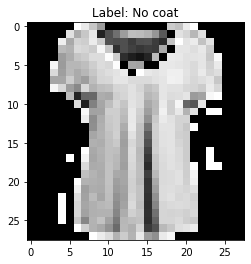

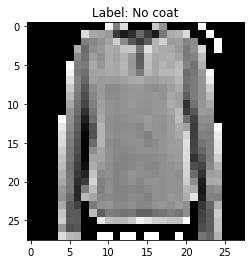

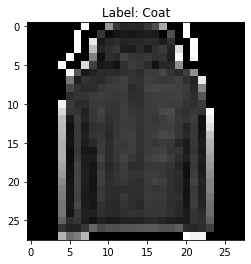

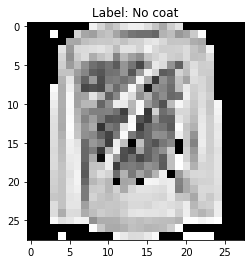

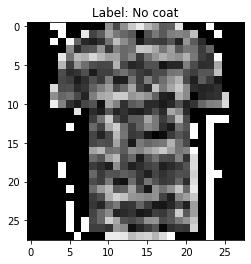

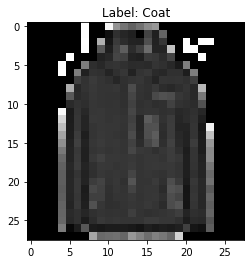

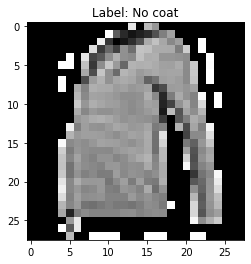

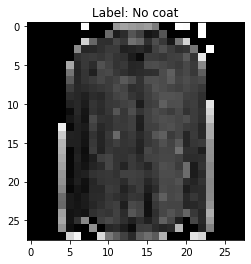

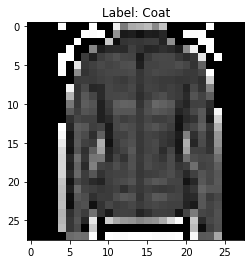

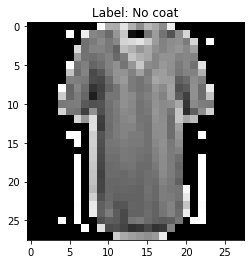

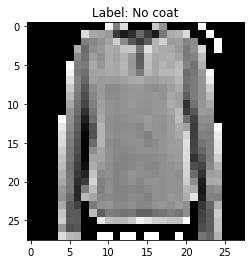

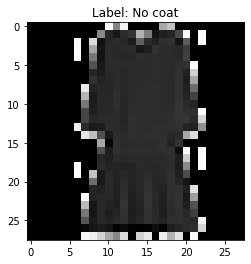

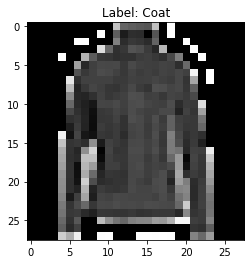

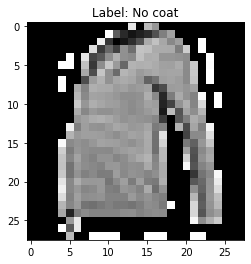

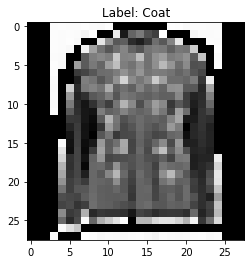

0    24000
1     6000
dtype: int64

In [97]:
#Features
X = train_img
#Labels
y = train_labels

#A routine that you can use for plotting some of the data. 
arr = ['No coat','Coat']
a = np.random.randint(1,40,15)
for i in a:
    two_d = (np.reshape(train_img[i], (28, 28)) * 255).astype(np.uint8)
    plt.title('Label: {0}'.format(arr[train_labels[i]]))
    plt.imshow(two_d, interpolation='nearest',cmap='gray')
    plt.show()
    
    
# Counting routine for training data (training + validaion) that should show that data are indeed imbalanced
pd.value_counts(train_labels)

In [98]:
    # Counting routine for training data (training + validaion) that should show that data are indeed imbalanced
pd.value_counts(train_labels)

0    24000
1     6000
dtype: int64

Now let's compare Random Forests (RF) and Gradient Boosting (GB) models on this imbalanced dataset. We first provide a suitable train-test split, as also done last week.
* Train a random forest classifier on this task, with the default model parameters. Use the routine get_evaluation (similar to last week, it now has an additional string parameter that should indicate on which set you do the evaluation, e.g. for the validation phase pass "Validation") to get a reasonable understanding of the outcome.
* Test your model on the two different test sets, pass the strings "Test 1" and "Test 2" to get_evaluation.

<h3 style="color:rgb(210,90,80)">Code (10 points):</h3>

In [99]:
print('\nPreparing Classifier Training and Validation Data...')
X_train, X_val, y_train, y_val = model_selection.train_test_split(X,y,test_size=0.1,random_state=RSEED)

# To Do

# End To Do


Preparing Classifier Training and Validation Data...


In [100]:
random_tree = RandomForestClassifier(random_state=RSEED )

In [101]:
random_forest_fit = random_tree.fit(X_train,y_train)

C:\Users\J. Park\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



Making Predictions on Validation Data...

Calculating Accuracy of Predictions...

Creating Confusion Matrix...

Predicted Values:  [0 0 0 ... 0 0 0]

Accuracy of Classifier on Validation Image Data:  0.9033333333333333

Confusion Matrix: 
 [[2350   87]
 [ 203  360]]


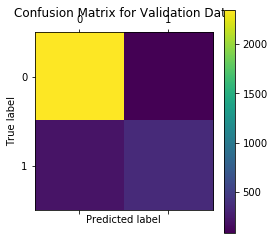

In [102]:
get_evaluation(random_forest_fit, X_val, y_val, set='Validation')



Making Predictions on Test Data...

Calculating Accuracy of Predictions...

Creating Confusion Matrix...

Predicted Values:  [0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1
 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0
 0 0 1 0 0 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1
 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0
 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 1
 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1
 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1
 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0 0 1
 0 1 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1
 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 

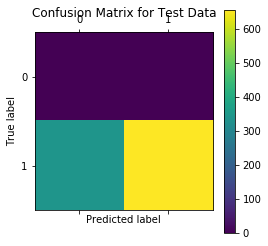

In [103]:
get_evaluation(random_forest_fit, test_img, test_labels, set='Test')


Making Predictions on Test Data...

Calculating Accuracy of Predictions...

Creating Confusion Matrix...

Predicted Values:  [0 0 0 ... 0 0 1]

Accuracy of Classifier on Test Image Data:  0.10016666666666667

Confusion Matrix: 
 [[5998    3    0    0    0    0    0    0    0    0]
 [6017   12    0    0    0    0    0    0    0    0]
 [5931  108    0    0    0    0    0    0    0    0]
 [5915   23    0    0    0    0    0    0    0    0]
 [ 576 5443    0    0    0    0    0    0    0    0]
 [5321  667    0    0    0    0    0    0    0    0]
 [5933   67    0    0    0    0    0    0    0    0]
 [5519  509    0    0    0    0    0    0    0    0]
 [5270  703    0    0    0    0    0    0    0    0]
 [5108  877    0    0    0    0    0    0    0    0]]


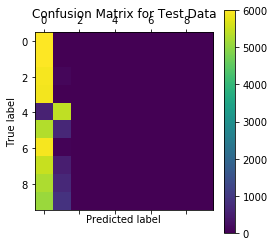

In [104]:
get_evaluation(random_forest_fit, new_test_data, new_test_label, set='Test')

Do the same task as before with a Gradient Boosting model from sklearn (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html), also with the default parameters. Don't forget to pass the seed!

<h3 style="color:rgb(210,90,80)">Code (10 points):</h3>

In [105]:
clf = GradientBoostingClassifier(random_state=RSEED)
grad_boost = clf.fit(X_train,y_train)                        


Making Predictions on Validation Data...

Calculating Accuracy of Predictions...

Creating Confusion Matrix...

Predicted Values:  [0 0 0 ... 0 0 0]

Accuracy of Classifier on Validation Image Data:  0.909

Confusion Matrix: 
 [[2309  128]
 [ 145  418]]


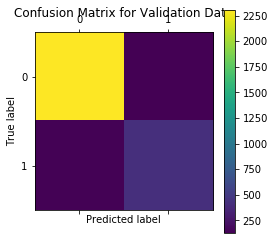

In [106]:
get_evaluation(grad_boost, X_val, y_val, set='Validation')


Making Predictions on Test Data...

Calculating Accuracy of Predictions...

Creating Confusion Matrix...

Predicted Values:  [1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1
 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0
 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0
 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0 1 1 1 0 1 1 1
 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1
 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1
 0 1 0 0 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 

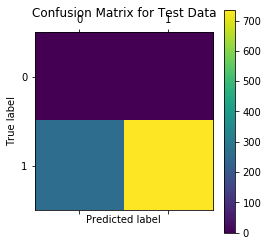

In [107]:
get_evaluation(grad_boost, test_img, test_labels, set='Test')


Making Predictions on Test Data...

Calculating Accuracy of Predictions...

Creating Confusion Matrix...

Predicted Values:  [0 1 0 ... 0 0 1]

Accuracy of Classifier on Test Image Data:  0.10011666666666667

Confusion Matrix: 
 [[5996    5    0    0    0    0    0    0    0    0]
 [6018   11    0    0    0    0    0    0    0    0]
 [5535  504    0    0    0    0    0    0    0    0]
 [5849   89    0    0    0    0    0    0    0    0]
 [1495 4524    0    0    0    0    0    0    0    0]
 [5819  169    0    0    0    0    0    0    0    0]
 [5714  286    0    0    0    0    0    0    0    0]
 [5992   36    0    0    0    0    0    0    0    0]
 [3931 2042    0    0    0    0    0    0    0    0]
 [5971   14    0    0    0    0    0    0    0    0]]


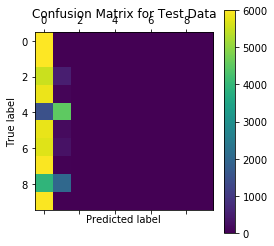

In [108]:
get_evaluation(grad_boost, new_test_data, new_test_label, set='Test')

<h3 style="color:rgb(210,90,80)">Question (10 points):</h3>

What observations can you make so far? Tick the correct boxes (several may be correct):
    
\[  V\]  Random Forest is much faster than Gradient Boosting, but the accuracy on the imbalanced test data set is lower. <br>
\[  \]  In general Random forest performs worse on the test set, but significantly (> 10%) better on the validation set. <br>
\[  V\]  As Gradient Boosting is very suitable for unbalanced data due to the nature of the algorithm, it is no surprise that it performs better than Random Forest on the imbalanced (first) test data. <br>
\[  V\]  The test performance of both algorithms on the imbalanced (first) test set is not very good (less than 80% accuracy). <br>
\[ V\] The test accuracy for the second test set is worse than on the first (imbalanced) set for both classifiers.